# Clustering Based on similar house together

# Here we have used K mean Clustering Algorithm to create Clusters based on  different Similarities

In [154]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import offsetbox
from sklearn.cluster import KMeans
%matplotlib inline


In [155]:
plt.rcParams["figure.figsize"] = (8,8)

In [156]:
# Load the data into dataframe
data=pd.read_csv("ParisHousing.csv")


In [157]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


# Take 'numberOfRooms' and 'floors' features to create clusters


In [158]:
x = data.iloc[:,[1,4]]

# Select random value for k

In [159]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [160]:
# fit the data into clusters

In [161]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

# Here we have taken 200 records for creating clusters

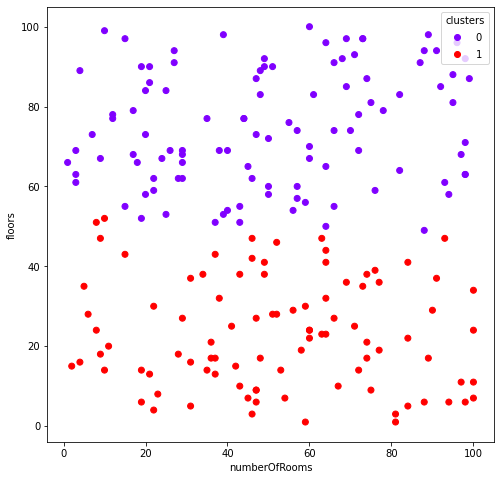

In [162]:
data_with_clusters = data.copy()
data_with_clusters=data_with_clusters
data_with_clusters['Clusters'] = identified_clusters 
fig, ax = plt.subplots()
sc=ax.scatter(data_with_clusters['numberOfRooms'][:200],data_with_clusters['floors'][:200],c=data_with_clusters['Clusters'][:200],cmap='rainbow')
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
ax.legend(*sc.legend_elements(), title='clusters',loc='upper right')


# find the optimal value of clusters (k) using 'Elbow Method'


Text(0, 0.5, 'Standard Error')

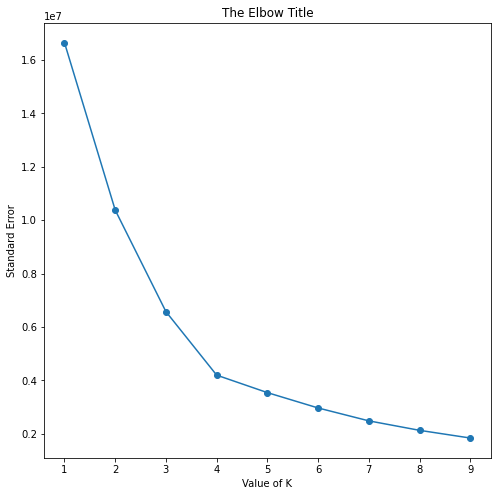

In [163]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

    number_clusters = range(1,10)
plt.plot(number_clusters,wcss,marker='o')
plt.title('The Elbow Title')
plt.xlabel('Value of K')
plt.ylabel('Standard Error')

# As we can see , the optimal value for k is 5 

In [164]:
# fit the data into 5 clusters
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(n_clusters=5)

In [165]:
# predict the clusters
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([4, 4, 0, ..., 4, 2, 0], dtype=int32)

# Create cluster for 100 records 

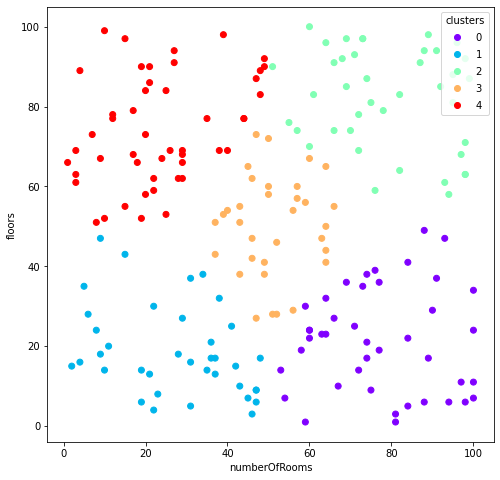

In [166]:
data_with_clusters = data.copy()
data_with_clusters=data_with_clusters
data_with_clusters['Clusters'] = identified_clusters 
fig, ax = plt.subplots()
sc=ax.scatter(data_with_clusters['numberOfRooms'][:200],data_with_clusters['floors'][:200],c=data_with_clusters['Clusters'][:200],cmap='rainbow')
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
ax.legend(*sc.legend_elements(), title='clusters',loc='upper right')



# Similarly We can take other two features to create clusters.
1.  Let's take numberOfRooms and numPrevOwners features

In [167]:
x = data.loc[:,['numberOfRooms','numPrevOwners']]

In [168]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [169]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, ..., 1, 0, 0], dtype=int32)

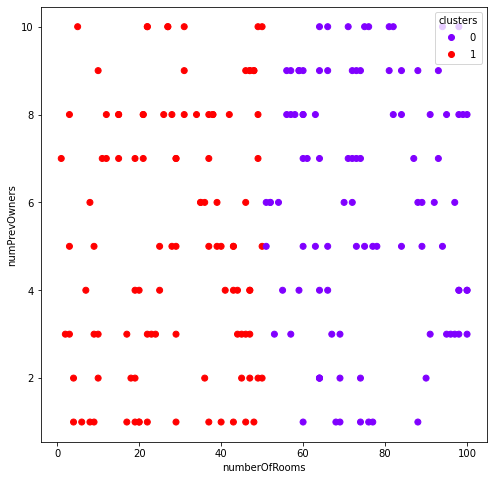

In [170]:
data_with_clusters = data.copy()
data_with_clusters=data_with_clusters
data_with_clusters['Clusters'] = identified_clusters 
fig, ax = plt.subplots()
sc=ax.scatter(data_with_clusters['numberOfRooms'][:200],data_with_clusters['numPrevOwners'][:200],c=data_with_clusters['Clusters'][:200],cmap='rainbow')
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
ax.legend(*sc.legend_elements(), title='clusters',loc='upper right')

Text(0, 0.5, 'Standard Error')

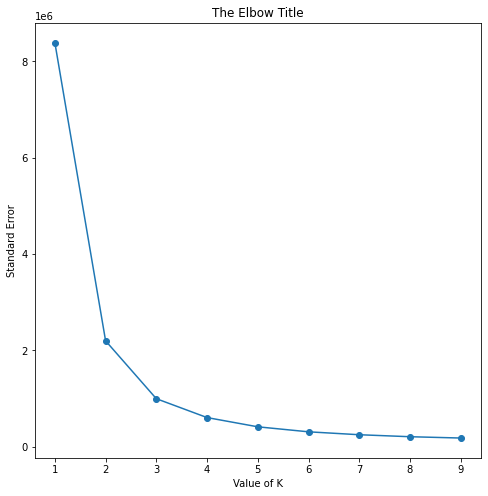

In [171]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

    number_clusters = range(1,10)
plt.plot(number_clusters,wcss,marker='o')
plt.title('The Elbow Title')
plt.xlabel('Value of K')
plt.ylabel('Standard Error')

In [172]:
# here optimal value of k is 4
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [173]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 3, 0, ..., 1, 0, 2], dtype=int32)

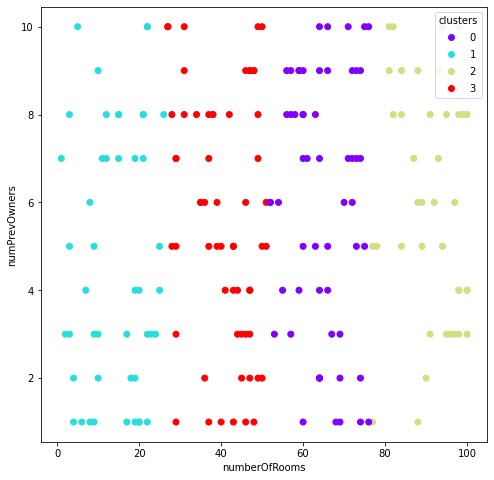

In [174]:
data_with_clusters = data.copy()
data_with_clusters=data_with_clusters
data_with_clusters['Clusters'] = identified_clusters 
fig, ax = plt.subplots()
sc=ax.scatter(data_with_clusters['numberOfRooms'][:200],data_with_clusters['numPrevOwners'][:200],c=data_with_clusters['Clusters'][:200],cmap='rainbow')
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
ax.legend(*sc.legend_elements(), title='clusters',loc='upper right')

# Create clusters based on 'cityPartRange' and 'made' year

In [175]:
x = data.loc[:,['cityPartRange','made']]


Text(0, 0.5, 'Standard Error')

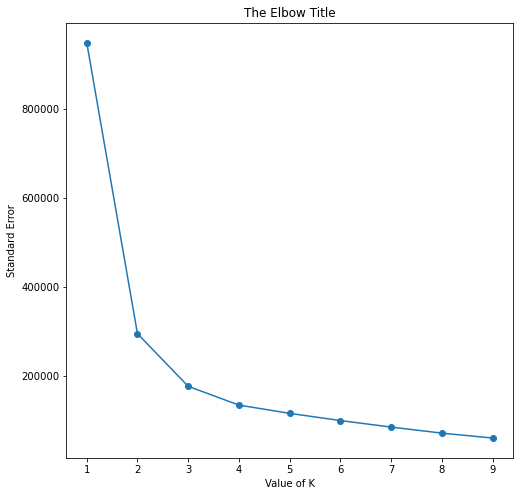

In [176]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

    number_clusters = range(1,10)
plt.plot(number_clusters,wcss,marker='o')
plt.title('The Elbow Title')
plt.xlabel('Value of K')
plt.ylabel('Standard Error')

In [177]:
# here optimal value of k is 3
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [178]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 1, 1, ..., 0, 0, 2], dtype=int32)

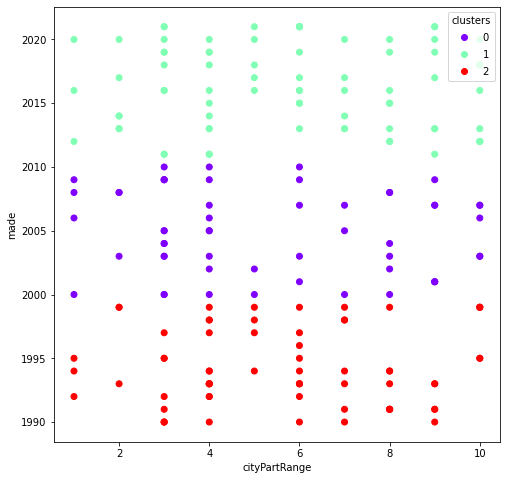

In [179]:
data_with_clusters = data.copy()
data_with_clusters=data_with_clusters
data_with_clusters['Clusters'] = identified_clusters 
fig, ax = plt.subplots()
sc=ax.scatter(data_with_clusters['cityPartRange'][:200],data_with_clusters['made'][:200],c=data_with_clusters['Clusters'][:200],cmap='rainbow')
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
ax.legend(*sc.legend_elements(), title='clusters',loc='upper right')

# Note:-
1. For implementing the K mean clustering , we have to first take a random value of k and create clusters based on the value of k.
2. To find the optimal value of k, we use 'Elbow' method. We can get the best value from the Elbow graph and the fit the data into new k clusters.
3. Similarly We can take any two features to create clusters.